In [ ]:
import sys
sys.path.append("../")

from utility.potential import *
from utility.propagation import *
from utility.units import CM_INV
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
from matplotlib.axes import Axes
from matplotlib.figure import Figure

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

@dataclass
class HarmonicPotential:
    mass_u: float
    
    omega_z: float
    omega_xy: float
    
    def value(self, r: Floating, theta: Floating) -> Floating:
        return 0.5 * self.mass_u * U * (r - 5) ** 2 *((self.omega_z * np.cos(theta)) ** 2 + (self.omega_xy * np.sin(theta)) ** 2)
    
    def show(self, r: FloatNDArray = np.linspace(0, 10, 300), theta: FloatNDArray = np.linspace(0, np.pi, 100)) -> tuple[Figure, Axes]:
        theta_mesh, r_mesh = np.meshgrid(theta, r, indexing="ij")
        potential_array = self.value(r_mesh, theta_mesh) / CM_INV
        potential_array = np.clip(potential_array, -np.inf, 4000)

        fig, ax = plt.subplots()
        CS = ax.contourf(r, theta, potential_array, levels=100)
        cbar = fig.colorbar(CS)
        cbar.ax.set_ylabel("Energy [cm$^{-1}$]")
        ax.set_xlabel("r [bohr]")
        ax.set_ylabel("$\\theta$ [rad]")

        return fig, ax

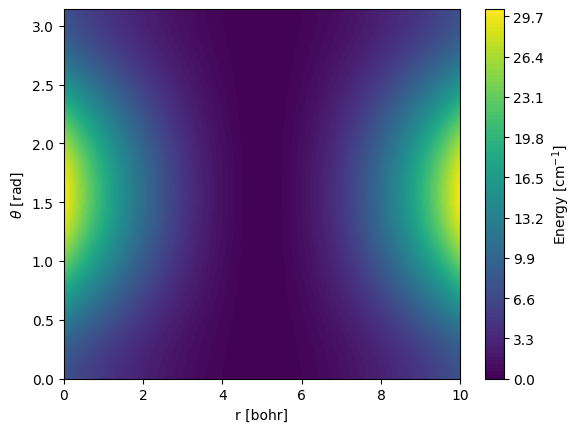

In [2]:
potential = HarmonicPotential(15, 1e-5, 2e-5)
fig, ax = potential.show();

In [3]:
def default_propagation(save_prefix: str, omega_init: int, j_tot: int, harmonic_potential: HarmonicPotential) -> Propagation:
    propagation = Propagation(save_prefix, omega_init, omega_init, j_tot)
    propagation.params.wave_r0 = 5
    propagation.params.wave_r_sigma = 2
    propagation.params.mass_u = harmonic_potential.mass_u
    propagation.params.rot_const = 0.

    propagation.config.r_start = 0.5 + 10 / 512
    propagation.config.r_no = 512
    propagation.config.r_end = 10.
    propagation.config.polar_no = 50
    
    propagation.config.time_step = 1000
    propagation.config.steps_no = 2000

    propagation.provider.potential = harmonic_potential
    propagation.provider.transform_gamma = 0.

    propagation.config.im_time = True
    propagation.config.animation = AnimationConfig.All

    return propagation

In [20]:
propagation = default_propagation("harmonic_iso", 2, 2, HarmonicPotential(6, 1e-4, 1e-4))
propagation = propagation.into_split()

propagation.propagate()
propagation.save_savers()
print(propagation.mean_energy())

5.768528824119525e-05


In [15]:
propagation = default_propagation("harmonic_aniso", 0, 2, HarmonicPotential(6, 1e-4, 4e-4))
propagation = propagation.into_split()

propagation.propagate()
propagation.save_savers()
print(propagation.mean_energy())

0.00010467463135458159


In [16]:
propagation = default_propagation("harmonic_aniso_v2", 0, 2, HarmonicPotential(6, 4e-4, 1e-4))
propagation = propagation.into_split()

propagation.propagate()
print(propagation.mean_energy())

8.35931268368237e-05


In [4]:
propagation = default_propagation("harmonic_iso_coriolis", 2, 2, HarmonicPotential(6, 1e-4, 1e-4))
propagation.config.coriolis_omega_max = 6
propagation = propagation.into_split()

propagation.propagate()
propagation.save_savers()
print(propagation.mean_energy())

4.9979136595565815e-05


In [18]:
propagation = default_propagation("harmonic_aniso_coriolis", 2, 2, HarmonicPotential(6, 1e-4, 4e-4))
propagation.config.coriolis_omega_max = 6
propagation = propagation.into_split()

propagation.propagate()
propagation.save_savers()
print(propagation.mean_energy())

9.353385337087627e-05


In [19]:
propagation = default_propagation("harmonic_aniso_coriolis_v2", 2, 2, HarmonicPotential(6, 4e-4, 1e-4))
propagation.config.coriolis_omega_max = 6
propagation = propagation.into_split()

propagation.propagate()
propagation.save_savers()
print(propagation.mean_energy())

7.233599005481728e-05
